**CALCULUS**

In [145]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,4]
import pandas as pd
from sklearn import datasets

In [146]:
def quadratic_function(theta):
  return 0.5*(2*theta-1)**2

Text(0, 0.5, 'Objective value')

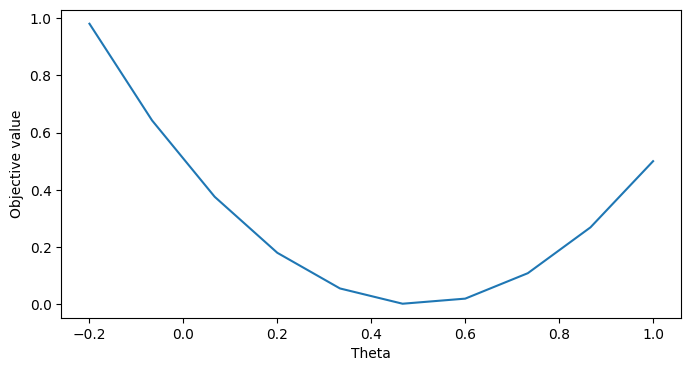

In [147]:
thetas = np.linspace(-0.2,1,10)
f_vals = quadratic_function(thetas[:, np.newaxis])
plt.plot(thetas, f_vals)
plt.xlabel('Theta')
plt.ylabel('Objective value')

In [148]:
def quadratic_derivative(theta):
  return (2*theta-1)*2

Text(0, 0.5, 'Objective value')

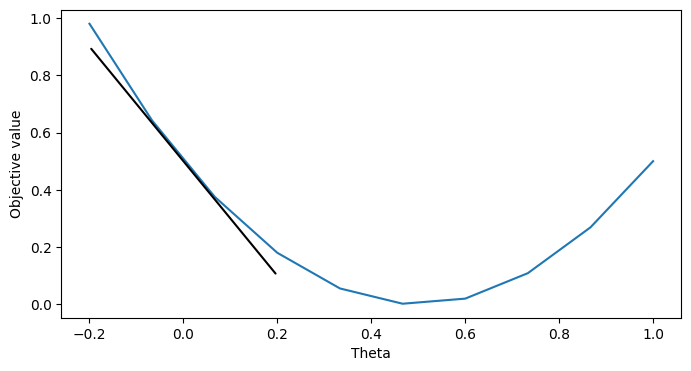

In [149]:
f0 = quadratic_function(np.array([[0]]))
df0 = quadratic_derivative(np.array([[0]]))
line_length = 0.2
plt.plot(thetas, f_vals)
# plt.annotate(text, xy, xytext, arrowprops) - annotate the point xy with text
#        the text can be displayed in another position xytext
#     arrowprops - properties used to draw a FancyArrowPatch arrow between the positions xy and xytext
plt.annotate('', xy=(0-line_length, f0-line_length*df0), xytext=(0+line_length, f0+line_length*df0),
             arrowprops={'arrowstyle': '-', 'lw': 1.5}, va='center', ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')

Text(0, 0.5, 'Objective value')

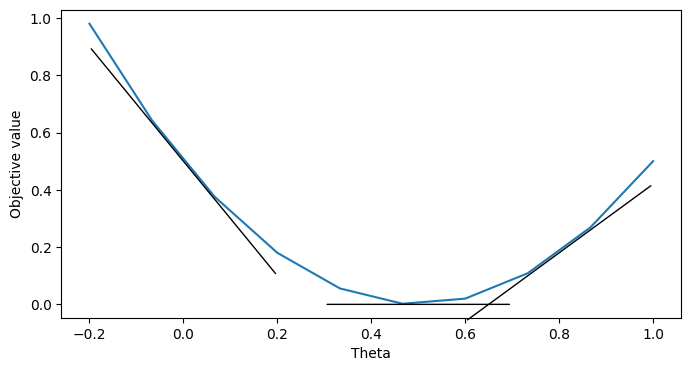

In [150]:
pts = np.array([[0, 0.5, 0.8]]).reshape((3,1))
f0s = quadratic_function(pts)
df0s = quadratic_derivative(pts)
plt.plot(thetas, f_vals)
for pt, f0, df0 in zip(pts.flatten(), f0s.flatten(), df0s.flatten()):
  plt.annotate('', xytext=(pt-line_length, f0-line_length*df0), xy=(pt+line_length, f0+line_length*df0),
               arrowprops={'arrowstyle': '-', 'lw': 1}, va='center', ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')

In [151]:
def quadratic_function2d(theta0, theta1):
  # np.asarray() - convert an input into a numpy array
  theta0 = np.atleast_2d(np.asarray(theta0))
  theta1 = np.atleast_2d(np.asarray(theta1))
  return 0.5*((2*theta1-2)**2 + (theta0-3)**2)

Text(0, 0.5, 'Theta1')

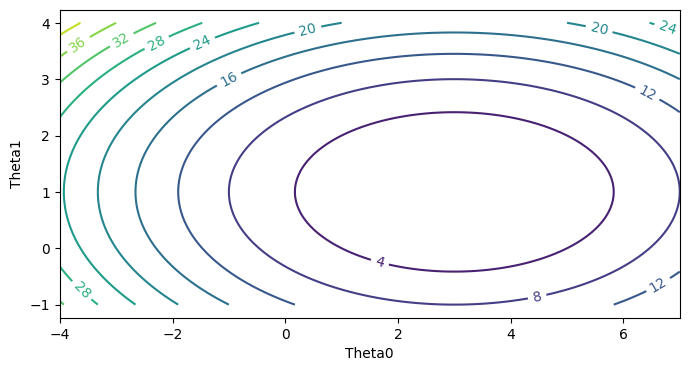

In [152]:
theta0_grid = np.linspace(-4,7,101)
theta1_grid = np.linspace(-1,4,101)
# J_grid.shape = (101,101)
J_grid = quadratic_function2d(theta0_grid[np.newaxis, :], theta1_grid[:, np.newaxis])
# np.meshgrid(X1,X2) - for vectors X1, X2 returns (len(X2), len(X1)) shaped arrays (coordinate matrices)
X, Y = np.meshgrid(theta0_grid, theta1_grid)
# plt.contour(X,Y,J_grid,levels) - plot contour lines
#    X,Y - the coordinates of the values in Z
#    Z - the height values over which the contour is drawn
#    levels - number of contour lines
contours = plt.contour(X, Y, J_grid, 10)
# plt.clabel(CS) - add labels to line contours in given ContourSet
plt.clabel(contours)
# plt.axis('equal') - equal axis aspect ratio
plt.axis('equal')
plt.xlabel('Theta0')
plt.ylabel('Theta1')

In [153]:
def quadratic_derivative2d(theta0, theta1):
  grads = np.stack([theta0-3, (2*theta1-2)*2], axis=1)
  grads = grads.reshape([len(theta0), 2])
  return grads

Text(0, 0.5, 'Theta1')

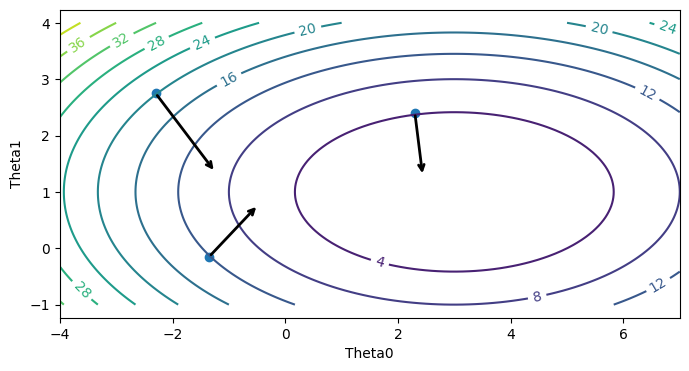

In [154]:
theta0_pts, theta1_pts = np.array([2.3,-1.35,-2.3]), np.array([2.4,-0.15,2.75])
dfs = quadratic_derivative2d(theta0_pts, theta1_pts)
contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.scatter(theta0_pts, theta1_pts)
for theta0_pt, theta1_pt, df in zip(theta0_pts, theta1_pts, dfs):
  plt.annotate('', xytext=(theta0_pt, theta1_pt), xy=(theta0_pt - line_length*df[0], theta1_pt - line_length*df[1]),
               arrowprops = {'arrowstyle': '->', 'lw': 2}, va='center', ha='center')
plt.axis('equal')
plt.xlabel('Theta0')
plt.ylabel('Theta1')

**GRADIENT DESCENT**

Text(0, 0.5, 'Theta1')

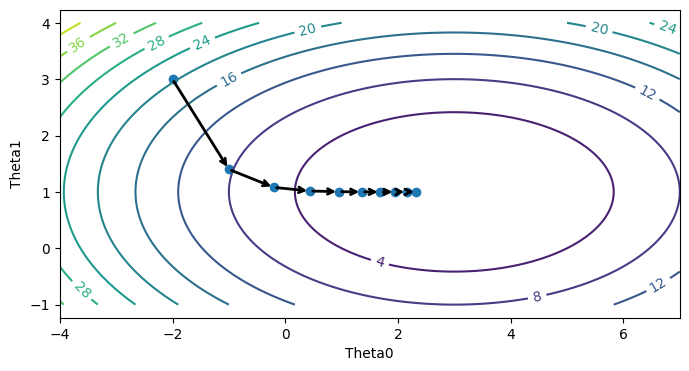

In [155]:
convergence_threshold = 2e-1
step_size = 2e-1
theta, theta_prev = np.array([[-2], [3]]), np.array([[0], [0]])
opt_pts = [theta.flatten()]
opt_grads = []
while np.linalg.norm(theta - theta_prev) > convergence_threshold:
  theta_prev = theta
  # func(theta[0], theta[1]) = func(*theta)
  gradient = quadratic_derivative2d(*theta).reshape([2,1])
  theta = theta_prev - step_size*gradient
  opt_pts += [theta.flatten()]
  opt_grads += [gradient.flatten()]

opt_pts = np.array(opt_pts)
opt_grads = np.array(opt_grads)
contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.scatter(opt_pts[:,0], opt_pts[:,1])
for opt_pt, opt_grad in zip(opt_pts, opt_grads):
  plt.annotate('', xytext=(opt_pt[0], opt_pt[1]), xy=(opt_pt[0]-step_size*opt_grad[0], opt_pt[1]-step_size*opt_grad[1]),
               arrowprops = {'arrowstyle': '->', 'lw': 2}, va='center', ha='center')
plt.axis('equal')
plt.xlabel('Theta0')
plt.ylabel('Theta1')



**GRADIENT DESCENT FOR LINEAR REGRESSION**

In [156]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


In [157]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

Text(0, 0.5, 'Diabetes risk')

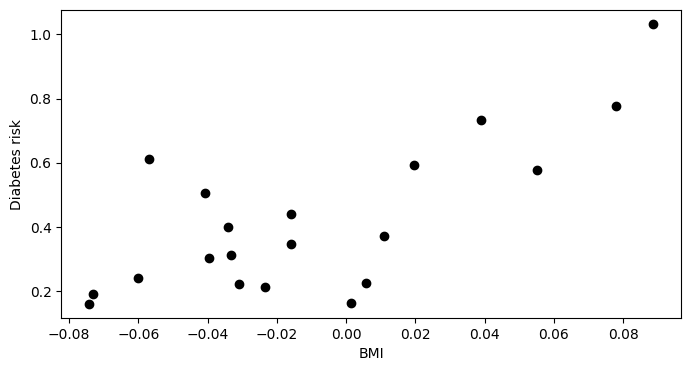

In [158]:
X['one'] = 1
X_train = X.iloc[-20:].loc[:, ['bmi', 'one']]
y_train = y.iloc[-20:] / 300
plt.scatter(X_train.loc[:, 'bmi'], y_train, color='black')
plt.xlabel('BMI')
plt.ylabel('Diabetes risk')

In [159]:
def f(X, theta):
  """ The linear model we are trying to fit.
  """
  return X.dot(theta)

In [160]:
def mean_squared_error(theta, X, y):
  """ The cost function describing the goodness of fit.
  """
  return 0.5*np.mean((y - f(X, theta))**2)

In [161]:
def mse_gradient(theta, X, y):
  return np.mean((f(X, theta) - y) * X.T, axis=1)

In [162]:
threshold = 1e-3
step_size = 4e-1
theta, theta_prev = np.array([2,1]), np.ones(2,)
opt_pts = [theta]
opt_grads = []
iter = 0
while np.linalg.norm(theta - theta_prev) > threshold:
  if iter % 100 == 0:
    print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
  theta_prev = theta
  gradient = mse_gradient(theta, X_train, y_train)
  theta = theta_prev - step_size*gradient
  opt_pts += [theta]
  opt_grads += [gradient]
  iter += 1

Iteration 0. MSE: 0.171729
Iteration 100. MSE: 0.014765
Iteration 200. MSE: 0.014349
Iteration 300. MSE: 0.013997
Iteration 400. MSE: 0.013701


Text(0, 0.5, 'Diabetes risk')

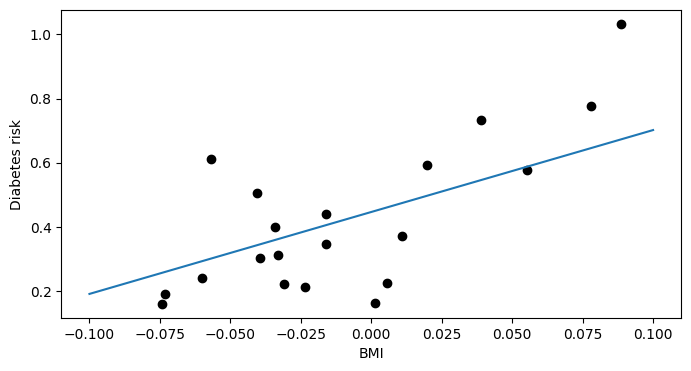

In [163]:
x_line = np.stack([np.linspace(-0.1, 0.1, 10), np.ones(10,)])
y_line = opt_pts[-1].dot(x_line)
plt.scatter(X_train.loc[:, 'bmi'], y_train, color='black')
plt.plot(x_line[0], y_line)
plt.xlabel('BMI')
plt.ylabel('Diabetes risk')

**NORMAL EQUATION   $θ=(X^TX)^{-1}X^Ty$**

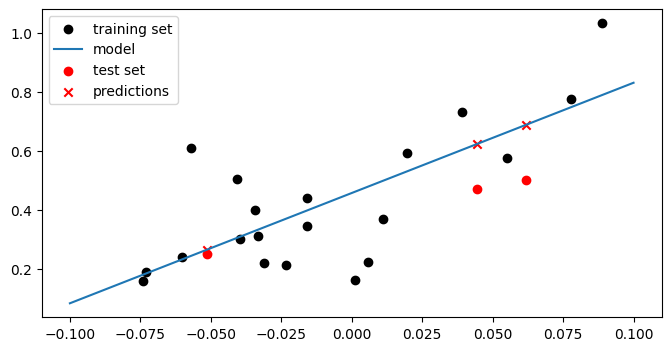

In [164]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
X_test = X.iloc[:3].loc[:, ['bmi', 'one']]
y_test = y.iloc[:3] / 300
y_test_pred = X_test.dot(theta_best)
plt.scatter(X_train.loc[:, 'bmi'], y_train, color='black')
x_line = np.stack([np.linspace(-0.1, 0.1, 10), np.ones(10,)])
y_line = theta_best.dot(x_line)
plt.plot(x_line[0], y_line)
plt.scatter(X_test.loc[:, 'bmi'], y_test, color='red')
plt.scatter(X_test.loc[:, 'bmi'], y_test_pred, color='red', marker='x')
plt.legend(['training set', 'model', 'test set', 'predictions'])